In [20]:
import sys
sys.path.insert(0, './ml')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ml.gs_rf import grid_search
from ml.SVM_RF import run as run_model
from ml import ML_util

from features.spatial_features_calc import get_spatial_features_names
from features.morphological_features_calc import get_morphological_features_names
from features.temporal_features_calc import get_temporal_features_names

In [2]:
chunks = [0, 500, 200]
modalities = ['spatial', 'morphological', 'temporal']
restrictions = ['complete', 'no_noise', 'no_small_sample', 'no_noise_nor_ss']

n_estimators_min = 0
n_estimators_max = 2
n_estimators_num = 3
max_depth_min = 1
max_depth_max = 2
max_depth_num = 2
min_samples_splits_min = 1
min_samples_splits_max = 5
min_samples_splits_num = 5
min_samples_leafs_min = 0
min_samples_leafs_max = 5
min_samples_leafs_num = 6
n = 10

In [3]:
def get_modality_results(data_path):
    accs, pyr_accs, in_accs = [], [], []
    
    _, acc, pyr_acc, in_acc, n_estimators, max_depth, min_samples_split, min_samples_leaf = grid_search(
        data_path + "/0_0.60.20.2/", False, n_estimators_min, n_estimators_max, n_estimators_num,
        max_depth_min, max_depth_max, max_depth_num, min_samples_splits_min, min_samples_splits_max,
        min_samples_splits_num, min_samples_leafs_min, min_samples_leafs_max, min_samples_leafs_num, n)
    accs.append(acc)
    pyr_accs.append(pyr_acc)
    in_accs.append(in_acc)
    
    restriction, modality = data_path.split('/')[-2:]
    
    if modality == 'temporal':
        accs = accs * len(chunks)
        pyr_accs = pyr_accs * len(chunks)
        in_accs = in_accs * len(chunks)
    else:
        for chunk_size in chunks[1:]:
            _, acc, pyr_acc, in_acc = run_model('rf', None, None, None, False, None, False, True, False, None, None, None,
                n_estimators, max_depth, min_samples_split, min_samples_leaf, data_path + f"/{chunk_size}_0.60.20.2/")
            accs.append(acc)
            pyr_accs.append(pyr_acc)
            in_accs.append(in_acc)
        
        
    df = pd.DataFrame({'restriction': restriction, 'modality': modality, 'chunk_size': chunks,
                           'accs': accs, 'pyr_accs': pyr_accs, 'in_accs': in_accs})
    
    return df
                                       
def get_folder_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for modality in modalities:
        modaility_df = get_modality_results(data_path + '/' + modality)
        df = df.append(modaility_df, ignore_index=True)
        
    return df

def get_results(data_path):
    df = pd.DataFrame({'restriction': [], 'modality': [], 'chunk_size': [], 'accs': [], 'pyr_accs': [], 'in_accs': []})
    for restriction in restrictions:
        folder_df = get_folder_results(data_path + '/' + restriction)
        df = df.append(folder_df, ignore_index=True)
        
    return df    

In [4]:
results = get_results('./data_sets')

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 325 waveforms (61.321%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 264 waveforms (81.231%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 61 waveforms (18.769%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 76 waveforms (14.340%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting of 56 waveforms (73.684%)
Total number of interneurons clusters in dev data is 20 (26.316%) consisting of 20 waveforms (26.316%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 129 (24.340%) consisting of 129 waveforms (24.340%)
Total number of pyramidal clusters in test data is 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.829, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.875,

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1, score=0.683, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=1, score=0

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.725, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.850,

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.775, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1, score=0.829, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1, score=0.725, total=   0.0s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=1, score=0.7

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.725, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, s

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1, score=0.805, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1, score=0.700, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=1, score=0.90

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=10, score=0.700, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.805, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16

[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10, score=0.775, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=10 
[C

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.675, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1, score=0.683, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1, score=0.775, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1, score=0.625, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1, score=0.725, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=1, score=0.77

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.780, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.725, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.950, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=10, s

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, s

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.659, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.800, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.750, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimator

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estim

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=0.683, total=   0.0s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=0.875, total=   0.0s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=0.700, total=   0.0s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=1, score=0.87

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.829, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.805, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.829, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.829, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.780, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.725, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.650, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.775, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.725, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.3min finished


Grid search completed in 76.50 seconds, best parameters are:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 100}
Grid search completed in 76.50 seconds, best parameters are:

Starting evaluation on test set...
Chosen model is Random Forest
Loading data set from ./data_sets/complete/spatial/500_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 27254 waveforms (53.340%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 9397 waveforms (34.479%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 17857 waveforms (65.521%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 11292 waveforms (22.100%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting of 1890 waveforms (16.738%)
Total number of interneurons clusters in dev data is 20

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.951, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_es

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.976, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


Chosen model is Random Forest
Loading data set from ./data_sets/complete/morphological/500_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 27254 waveforms (53.340%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 9397 waveforms (34.479%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 17857 waveforms (65.521%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 11292 waveforms (22.100%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting of 1890 waveforms (16.738%)
Total number of interneurons clusters in dev data is 20 (26.316%) consisting of 9402 waveforms (83.262%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 129 (24.340%) consisting of 12549 waveforms (24.560%)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[C

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_dep

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10, score=0.800, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100,

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_de

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estima

[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10, score=0.975, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_esti

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.927, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.902, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.775, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.854, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.900, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.925, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.850, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=10, score=0.825, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.878, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_spl

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


Loading data set from ./data_sets/no_noise/spatial/0_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 317 waveforms (61.079%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 257 waveforms (81.073%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 60 waveforms (18.927%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 75 waveforms (14.451%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consisting of 56 waveforms (74.667%)
Total number of interneurons clusters in dev data is 19 (25.333%) consisting of 19 waveforms (25.333%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 127 (24.470%) consisting of 127 waveforms (24.470%)
Total number of pyramidal clusters in test data is 9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, sc

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.949, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.923,

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.750, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.700, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.718, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.87

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100,

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.769, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.769, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=10, score=0.846,

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.769, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=10, score=0.872,

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1, score=0.625, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=1, score=0.69

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100,

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100,

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.775, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.795, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.692, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.667, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.744, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100,

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.725, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.718, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.872, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=10, s

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.800, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.650, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.667, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimator

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.750, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=10, score=0.923, total=   0.0s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimat

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10, score=0.846, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10, score=0.769, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10, score=0.795, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estim

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1, score=0.775, total=   0.0s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1, score=0.600, total=   0.0s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1, score=0.718, total=   0.0s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1, score=0.615, total=   0.0s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=1,

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.775, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.825, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.725, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.718, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.692, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.2min finished


Fitting took 0.46 seconds
Evaluating predictions...
Number of correct classified clusters is 113, which is 88.9764%
Number of correct classified chunks is 10915, which is 87.2084%
Test set consists of 98 pyramidal cells and 29 interneurons
88.7755% of pyramidal cells classified correctly
89.6552% of interneurons classified correctly
Chosen model is Random Forest
Loading data set from ./data_sets/no_noise/spatial/200_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 67271 waveforms (53.249%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 22912 waveforms (34.059%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 44359 waveforms (65.941%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 27678 waveforms (21.909%)
Total number of pyramidal clusters in dev data is 56 (74.667%) con

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=0.923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=0.949, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=0.974, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=0.949, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1, score=1.000, total=   0

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estima

[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.949, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.949, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.949, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.846, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.949, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_est

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.0min finished


Grid search completed in 62.26 seconds, best parameters are:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 16, 'n_estimators': 100}
Grid search completed in 62.26 seconds, best parameters are:

Starting evaluation on test set...
Chosen model is Random Forest
Loading data set from ./data_sets/no_noise/morphological/500_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 26811 waveforms (53.225%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 9088 waveforms (33.897%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 17723 waveforms (66.103%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 11046 waveforms (21.928%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consisting of 1890 waveforms (17.110%)
Total number of interneurons clusters in dev data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.975, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.872, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.950, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.923, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.846, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.795, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.875, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.850, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.925, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.974, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.821, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


Grid search completed in 64.65 seconds, best parameters are:
{'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Grid search completed in 64.65 seconds, best parameters are:

Starting evaluation on test set...
Loading data set from ./data_sets/no_small_sample/spatial/0_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 221 waveforms (62.429%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 161 waveforms (72.851%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 60 waveforms (27.149%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 73 waveforms (20.621%)
Total number of pyramidal clusters in dev data is 51 (69.863%) consisting of 51 waveforms (69.863%)
Total number of interneurons clusters in dev data is 22 (30.137%) consisting of 22 waveform

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.862, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.828, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.931, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.862, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.80

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.733, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.700, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.767, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.500, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.517, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=1, score=0.724,

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.828, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.83

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=1

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.586, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.621, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.586, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.759, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10, score=0.759, total=   0.0s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=10

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.931, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.793, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10, score=0.828, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=10

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.621, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.586, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.667, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.655, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.552, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


Fitting took 0.51 seconds
Evaluating predictions...
Number of correct classified clusters is 53, which is 88.3333%
Number of correct classified chunks is 8944, which is 89.9346%
Test set consists of 42 pyramidal cells and 18 interneurons
88.0952% of pyramidal cells classified correctly
88.8889% of interneurons classified correctly
Chosen model is Random Forest
Loading data set from ./data_sets/no_small_sample/spatial/200_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 68255 waveforms (55.008%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 20924 waveforms (30.656%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 47331 waveforms (69.344%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 30918 waveforms (24.918%)
Total number of pyramidal clusters in dev data is 51 (69.863%

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.931, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.96

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=1, score=0.862, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=1, score=0.690, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=1, score=0.862, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.933, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=0.933, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=10, score=

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.966, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.828, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.655, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.897, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_est

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.0min finished


Grid search completed in 60.78 seconds, best parameters are:

Starting evaluation on test set...
Chosen model is Random Forest
Loading data set from ./data_sets/no_small_sample/morphological/500_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 27229 waveforms (54.988%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 8316 waveforms (30.541%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 18913 waveforms (69.459%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 12344 waveforms (24.928%)
Total number of pyramidal clusters in dev data is 51 (69.863%) consisting of 2456 waveforms (19.896%)
Total number of interneurons clusters in dev data is 22 (30.137%) consisting of 9888 waveforms (80.104%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.931, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.767, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1, score=0.724, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=1, score=0.828, total=   0.0s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=10,

[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.933, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.833, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.900, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.733, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.867, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.967, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.800, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.700, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.793, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.690, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.828, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.759, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10, score=0.867, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_e

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.0min finished


Grid search completed in 61.95 seconds, best parameters are:
{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Grid search completed in 61.95 seconds, best parameters are:

Starting evaluation on test set...
Loading data set from ./data_sets/no_noise_nor_ss/spatial/0_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 217 waveforms (62.717%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 157 waveforms (72.350%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 60 waveforms (27.650%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 69 waveforms (19.942%)
Total number of pyramidal clusters in dev data is 49 (71.014%) consisting of 49 waveforms (71.014%)
Total number of interneurons clusters in dev data is 20 (28.986%) consisting of 20 waveform

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.893, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.857, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.964, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.89

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.655, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.862, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.786, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.786, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.821, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=10, score=0.893, total=   0.0s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100,

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.759, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.621, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.655, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.690, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.724, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.1min finished


Fitting took 0.47 seconds
Evaluating predictions...
Number of correct classified clusters is 52, which is 86.6667%
Number of correct classified chunks is 9207, which is 92.5792%
Test set consists of 42 pyramidal cells and 18 interneurons
85.7143% of pyramidal cells classified correctly
88.8889% of interneurons classified correctly
Chosen model is Random Forest
Loading data set from ./data_sets/no_noise_nor_ss/spatial/200_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 67638 waveforms (55.286%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 20307 waveforms (30.023%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 47331 waveforms (69.977%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 29795 waveforms (24.354%)
Total number of pyramidal clusters in dev data is 49 (71.014%

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.964, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=1.

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1, score=1.000, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1, score=0.893, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1, score=0.929, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1, score=1.000, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=10, score=0.966, total=   0.0s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=1

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estima

[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=16

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=1.000, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.759, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=1.000, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.964, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.857, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=1, score=0.964, total=   0.0s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=32, n_estimators=10 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=32, n_est

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.0min finished


Chosen model is Random Forest
Loading data set from ./data_sets/no_noise_nor_ss/morphological/500_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 26984 waveforms (55.267%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 8071 waveforms (29.910%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 18913 waveforms (70.090%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 11896 waveforms (24.365%)
Total number of pyramidal clusters in dev data is 49 (71.014%) consisting of 2388 waveforms (20.074%)
Total number of interneurons clusters in dev data is 20 (28.986%) consisting of 9508 waveforms (79.926%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 60 (17.341%) consisting of 9945 waveforms (20.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.964, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.857, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=0.893, total=   0.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=32, n_estima

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=100, s

[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=16, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=2, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=8, n_estima

[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=16, min_samples_split=3

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=4, n_estima

[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=32, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=8, n_estima

[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=1, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=1, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=2, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=2, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estima

[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.966, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=8, n_estimat

[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=4, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=4, min_samples_split=3

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=4, n_estima

[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.828, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=8, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=8, min_samples_split=1

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=2, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=8, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=16, min_samples_split=32, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=16, min_samp

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.862, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=4, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=

[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.897, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.793, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100, score=0.931, total=   0.1s
[CV] max_depth=100, min_samples_leaf=32, min_samples_split=16, n_estimators=100 
[CV]  max_depth=100, min_samples_leaf=32, min_samp

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:  1.0min finished


In [5]:
print(results)

        restriction       modality  chunk_size        accs    pyr_accs  \
0          complete        spatial         0.0   82.170543   86.000000   
1          complete        spatial       500.0   89.922481   92.000000   
2          complete        spatial       200.0   93.798450   95.000000   
3          complete  morphological         0.0  100.000000  100.000000   
4          complete  morphological       500.0   97.674419   97.000000   
5          complete  morphological       200.0   97.674419   97.000000   
6          complete       temporal         0.0   90.697674   98.000000   
7          complete       temporal       500.0   90.697674   98.000000   
8          complete       temporal       200.0   90.697674   98.000000   
9          no_noise        spatial         0.0   85.826772   91.836735   
10         no_noise        spatial       500.0   88.976378   88.775510   
11         no_noise        spatial       200.0   92.125984   91.836735   
12         no_noise  morphological    

In [6]:
results = results.set_index(['restriction', 'modality', 'chunk_size'], append=True)  # create multi-index

In [7]:
results.to_csv('results_for_report.csv')

In [8]:
results

accs    pyr_accs  \
   restriction     modality      chunk_size                           
0  complete        spatial       0.0          82.170543   86.000000   
1  complete        spatial       500.0        89.922481   92.000000   
2  complete        spatial       200.0        93.798450   95.000000   
3  complete        morphological 0.0         100.000000  100.000000   
4  complete        morphological 500.0        97.674419   97.000000   
5  complete        morphological 200.0        97.674419   97.000000   
6  complete        temporal      0.0          90.697674   98.000000   
7  complete        temporal      500.0        90.697674   98.000000   
8  complete        temporal      200.0        90.697674   98.000000   
9  no_noise        spatial       0.0          85.826772   91.836735   
10 no_noise        spatial       500.0        88.976378   88.775510   
11 no_noise        spatial       200.0        92.125984   91.836735   
12 no_noise        morphological 0.0         100.000000  100.000000   
13 no_noise        morphological 500.0        99.212598   98.979592   
14 no_noise        morphological 200.0        99.212598   98.979592   
15 no_noise        temporal      0.0          91.338583   97.959184   
16 no_noise        temporal      500.0        91.338583   97.959184   
17 no_noise        temporal      200.0        91.338583   97.959184   
18 no_small_sample spatial       0.0          81.666667   83.333333   
19 no_small_sample spatial       500.0        88.333333   88.095238   
20 no_small_sample spatial       200.0        91.666667   90.476190   
21 no_small_sample morphological 0.0          96.666667  100.000000   
22 no_small_sample morphological 500.0        96.666667   97.619048   
23 no_small_sample morphological 200.0        96.666667   97.619048   
24 no_small_sample temporal      0.0          91.666667   97.619048   
25 no_small_sample temporal      500.0        91.666667   97.619048   
26 no_small_sample temporal      200.0        91.666667   97.619048   
27 no_noise_nor_ss spatial       0.0          81.666667   85.714286   
28 no_noise_nor_ss spatial       500.0        86.666667   85.714286   
29 no_noise_nor_ss spatial       200.0        91.666667   88.095238   
30 no_noise_nor_ss morphological 0.0          96.666667  100.000000   
31 no_noise_nor_ss morphological 500.0        96.666667   97.619048   
32 no_noise_nor_ss morphological 200.0        96.666667   97.619048   
33 no_noise_nor_ss temporal      0.0          90.000000   95.238095   
34 no_noise_nor_ss temporal      500.0        90.000000   95.238095   
35 no_noise_nor_ss temporal      200.0        90.000000   95.238095   

                                                in_accs  
   restriction     modality      chunk_size              
0  complete        spatial       0.0          68.965517  
1  complete        spatial       500.0        82.758621  
2  complete        spatial       200.0        89.655172  
3  complete        morphological 0.0         100.000000  
4  complete        morphological 500.0       100.000000  
5  complete        morphological 200.0       100.000000  
6  complete        temporal      0.0          65.517241  
7  complete        temporal      500.0        65.517241  
8  complete        temporal      200.0        65.517241  
9  no_noise        spatial       0.0          65.517241  
10 no_noise        spatial       500.0        89.655172  
11 no_noise        spatial       200.0        93.103448  
12 no_noise        morphological 0.0         100.000000  
13 no_noise        morphological 500.0       100.000000  
14 no_noise        morphological 200.0       100.000000  
15 no_noise        temporal      0.0          68.965517  
16 no_noise        temporal      500.0        68.965517  
17 no_noise        temporal      200.0        68.965517  
18 no_small_sample spatial       0.0          77.777778  
19 no_small_sample spatial       500.0        88.888889  
20 no_small_sample spatial       200.0        94.444444  
21 no_small_sample

In [18]:
def get_num_cells(restriction):
    data_path = f"./data_sets/{restriction}/spatial/0_0.60.20.2/"
    train, dev, test, _, _, _ = ML_util.get_dataset(data_path)
    tot_n = len(train) + len(dev) + len(test)
    test_n = len(test)
    pyr_n = len([cell for cell in test if cell[0][-1] == 1])
    in_n = len([cell for cell in test if cell[0][-1] == 0])
    return tot_n, test_n, pyr_n, in_n

def autolabel(rects, ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    This function was taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    for rect in rects:
        height = rect.get_height()
        if height == 0:
            continue
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_results(df, restriction):
    tot_n, test_n, pyr_n, in_n = get_num_cells(restriction)
    
    labels = modalities
    
    zero = df.xs(0, level="chunk_size").accs
    five_hundred = df.xs(500, level="chunk_size").accs
    two_hundred = df.xs(200, level="chunk_size").accs

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize = (12, 12))
    rects1 = ax.bar(x - width, zero, width, label='chunk_size = 0')
    rects2 = ax.bar(x, five_hundred, width, label='chunk_size = 500')
    rects3 = ax.bar(x + width, two_hundred, width, label='chunk_size = 200')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores (percentage)')
    ax.set_title(f"Scores by modality and chunk size; Total={tot_n}, Test={test_n}, PYR={pyr_n}, IN={in_n}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(rects1, ax)
    autolabel(rects2, ax)
    autolabel(rects3, ax)

    fig.tight_layout()

    plt.show()

Loading data set from ./data_sets/complete/spatial/0_0.60.20.2/...
Total number of clusters in train data is 325 (61.321%) consisting of 325 waveforms (61.321%)
Total number of pyramidal clusters in train data is 264 (81.231%) consisting of 264 waveforms (81.231%)
Total number of interneurons clusters in train data is 61 (18.769%) consisting of 61 waveforms (18.769%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 76 (14.340%) consisting of 76 waveforms (14.340%)
Total number of pyramidal clusters in dev data is 56 (73.684%) consisting of 56 waveforms (73.684%)
Total number of interneurons clusters in dev data is 20 (26.316%) consisting of 20 waveforms (26.316%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 129 (24.340%) consisting of 129 waveforms (24.340%)
Total number of pyramidal clusters in test data is 1

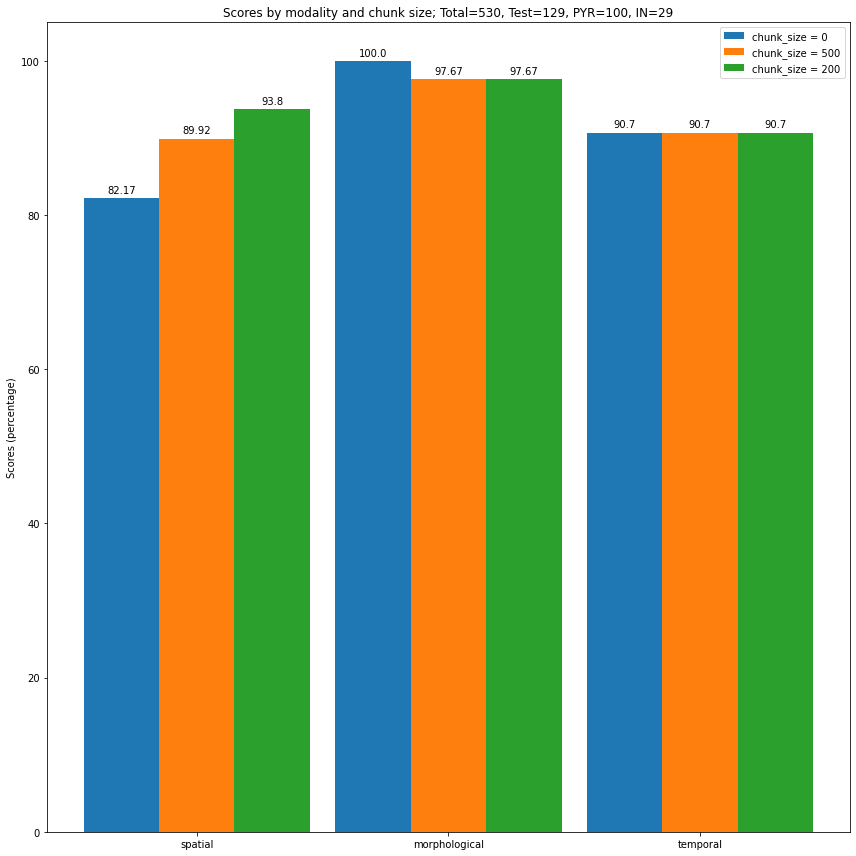

In [21]:
complete = results.loc[:, 'complete', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(complete, 'complete')

Loading data set from ./data_sets/no_noise/spatial/0_0.60.20.2/...
Total number of clusters in train data is 317 (61.079%) consisting of 317 waveforms (61.079%)
Total number of pyramidal clusters in train data is 257 (81.073%) consisting of 257 waveforms (81.073%)
Total number of interneurons clusters in train data is 60 (18.927%) consisting of 60 waveforms (18.927%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 75 (14.451%) consisting of 75 waveforms (14.451%)
Total number of pyramidal clusters in dev data is 56 (74.667%) consisting of 56 waveforms (74.667%)
Total number of interneurons clusters in dev data is 19 (25.333%) consisting of 19 waveforms (25.333%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 127 (24.470%) consisting of 127 waveforms (24.470%)
Total number of pyramidal clusters in test data is 9

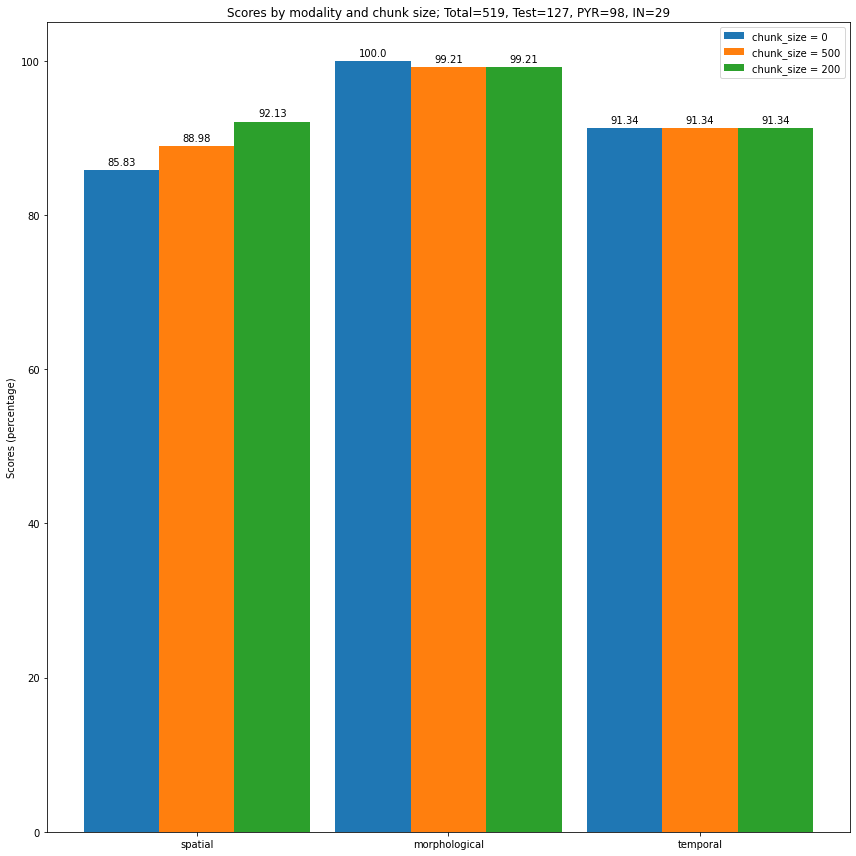

In [22]:
no_noise = results.loc[:, 'no_noise', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_noise, 'no_noise')

Loading data set from ./data_sets/no_small_sample/spatial/0_0.60.20.2/...
Total number of clusters in train data is 221 (62.429%) consisting of 221 waveforms (62.429%)
Total number of pyramidal clusters in train data is 161 (72.851%) consisting of 161 waveforms (72.851%)
Total number of interneurons clusters in train data is 60 (27.149%) consisting of 60 waveforms (27.149%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 73 (20.621%) consisting of 73 waveforms (20.621%)
Total number of pyramidal clusters in dev data is 51 (69.863%) consisting of 51 waveforms (69.863%)
Total number of interneurons clusters in dev data is 22 (30.137%) consisting of 22 waveforms (30.137%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 60 (16.949%) consisting of 60 waveforms (16.949%)
Total number of pyramidal clusters in test data

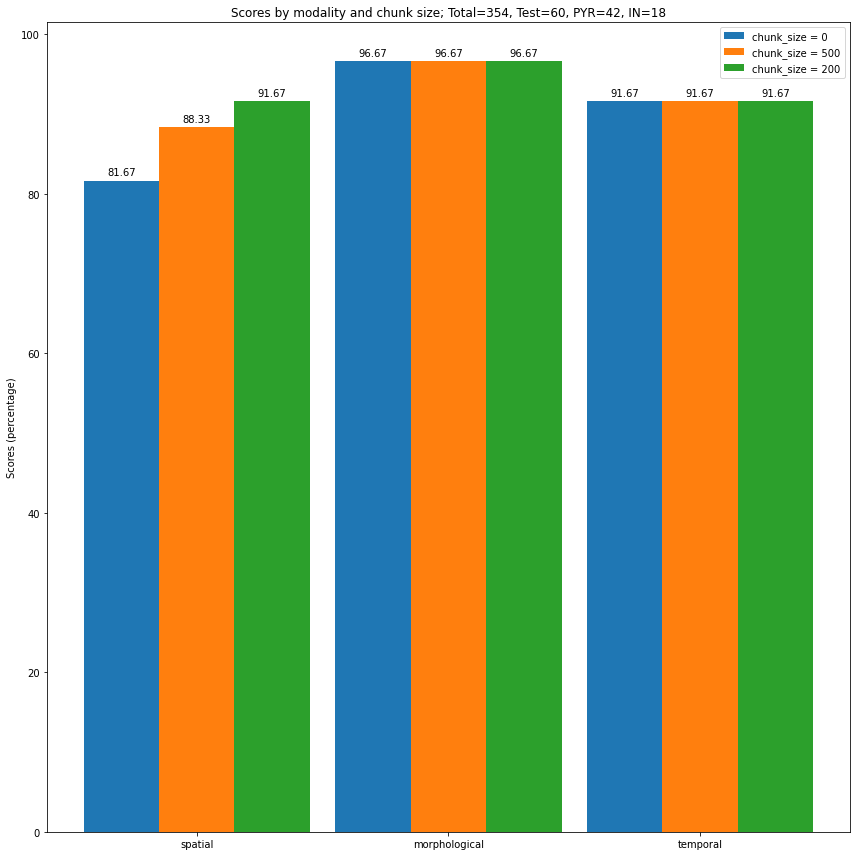

In [23]:
no_small_sample = results.loc[:, 'no_small_sample', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_small_sample, 'no_small_sample')

Loading data set from ./data_sets/no_noise_nor_ss/spatial/0_0.60.20.2/...
Total number of clusters in train data is 217 (62.717%) consisting of 217 waveforms (62.717%)
Total number of pyramidal clusters in train data is 157 (72.350%) consisting of 157 waveforms (72.350%)
Total number of interneurons clusters in train data is 60 (27.650%) consisting of 60 waveforms (27.650%)
Total number of untagged clusters in train data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in dev data is 69 (19.942%) consisting of 69 waveforms (19.942%)
Total number of pyramidal clusters in dev data is 49 (71.014%) consisting of 49 waveforms (71.014%)
Total number of interneurons clusters in dev data is 20 (28.986%) consisting of 20 waveforms (28.986%)
Total number of untagged clusters in dev data is 0 (0.000%) consisting of 0 waveforms (0.000%)
Total number of clusters in test data is 60 (17.341%) consisting of 60 waveforms (17.341%)
Total number of pyramidal clusters in test data

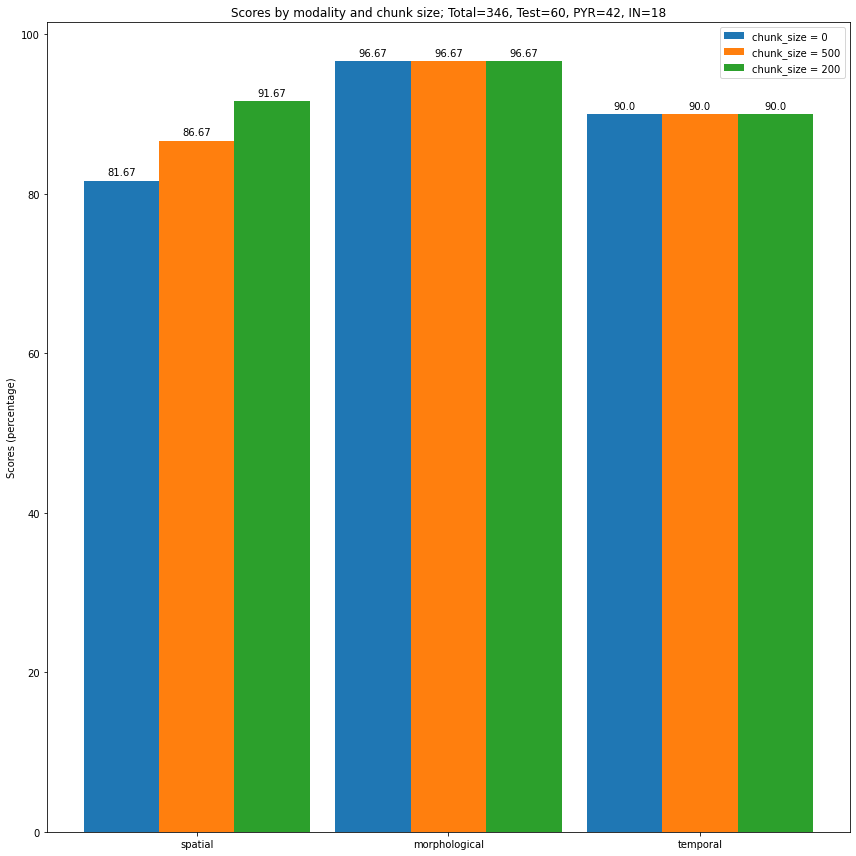

In [24]:
no_noise_nor_ss = results.loc[:, 'no_noise_nor_ss', :, :].drop(columns = ['pyr_accs', 'in_accs'])
plot_results(no_noise_nor_ss, 'no_noise_nor_ss')